# IBM Developer Skills Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'https://raw.githubusercontent.com/sonpn82/Data-analysis-with-python/master/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Linear regression

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()

In [5]:
X = df[['highway-mpg']]
y = df[['price']]

In [7]:
lm.fit(X,y)

LinearRegression()

In [8]:
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [9]:
lm.intercept_  # intercept y=ax+b  b value

array([38423.30585816])

In [10]:
lm.coef_  # coefficient a value

array([[-821.73337832]])

In [11]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [12]:
X = df[['engine-size']]
Y = df['price']
lm1.fit(X, Y)

LinearRegression()

In [13]:
lm1.coef_

array([166.86001569])

In [14]:
lm1.intercept_

-7963.338906281042

## Multiple linear regression

In [58]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [16]:
lm.fit(Z, df['price'])

LinearRegression()

In [17]:
lm.intercept_

-15806.624626329205

In [18]:
lm.coef_  # Y = a + b1X1 + b2X2 + b3X3 + b4X4 ...

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [19]:
lm2 = LinearRegression()
Z2 = df[['normalized-losses','highway-mpg']]
lm2.fit(Z2, df['price'])

LinearRegression()

In [20]:
lm2.coef_

array([   1.49789586, -820.45434016])

# Model evaluation using visualization

In [21]:
import seaborn as sns
%matplotlib inline

## Regression plot

(0.0, 48169.32541234739)

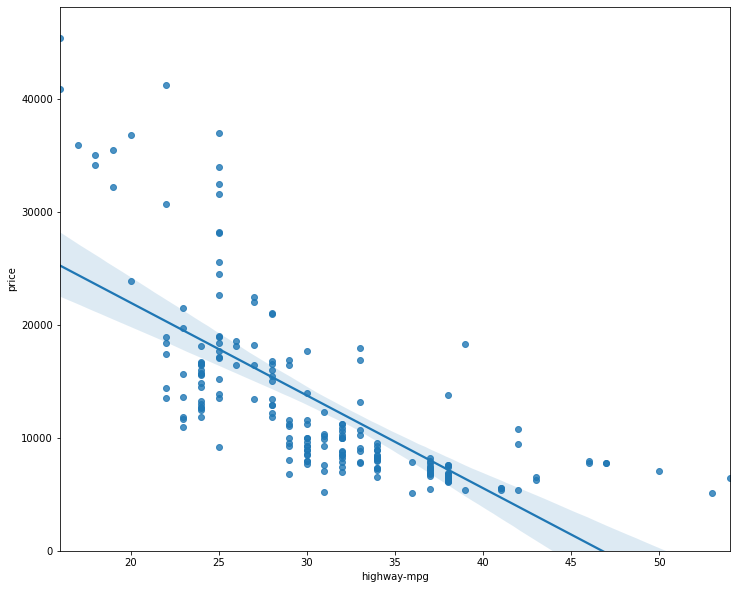

In [24]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)  # min for y axis = 0

(0.0, 47414.1)

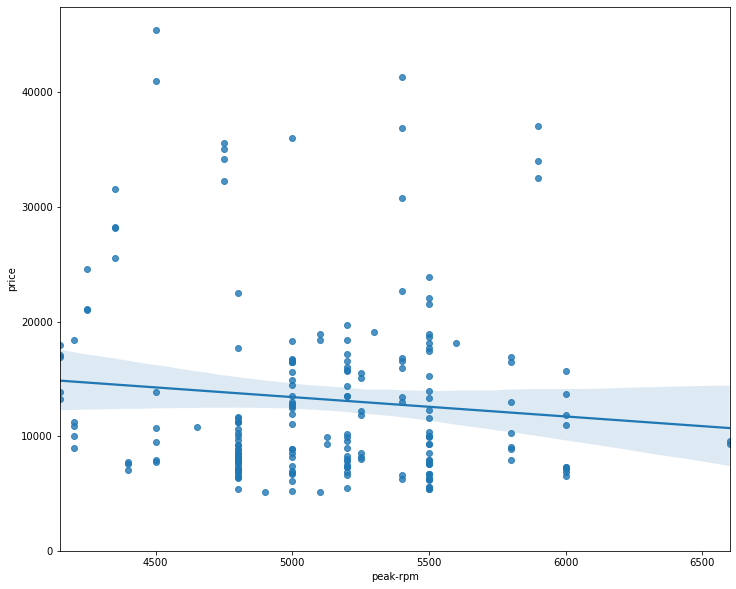

In [25]:
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

In [26]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


## Residual plot

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


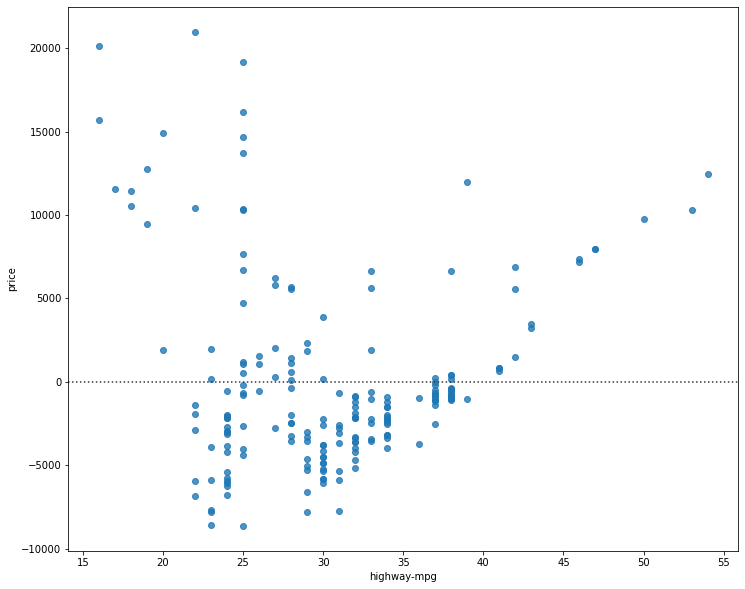

In [27]:
wdith = 12
height= 10
plt.figure(figsize=(wdith,height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

### Residual are not randomly spread around X axis ==> not linear relation!

## Multiple linear regression

In [28]:
y_hat = lm.predict(Z)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


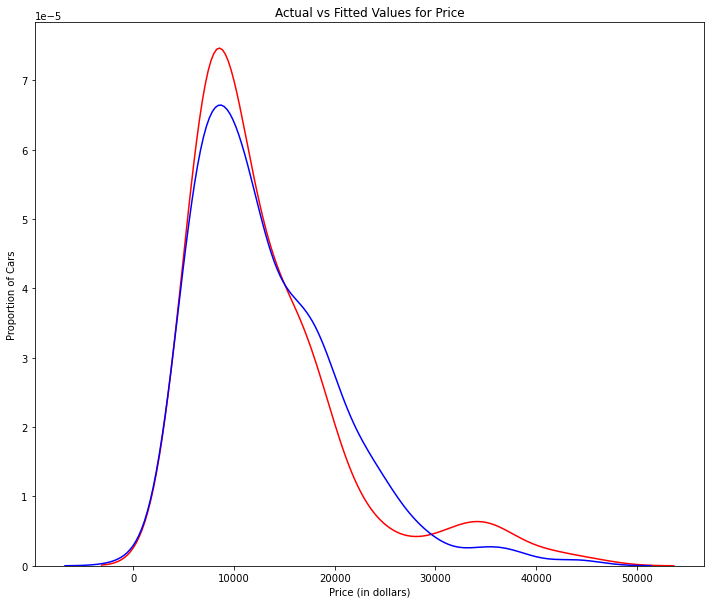

In [31]:
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(y_hat, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Good fit but some area still need improvement

# Polynominal regression and pipelines

In [33]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)  # min 15 max 55 number = 100
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()  # get the current axe
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()  # get the current figure
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [59]:
x = df['highway-mpg']
y = df['price']

In [35]:
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


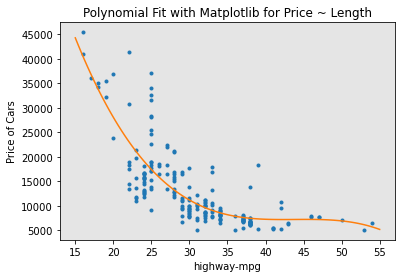

In [60]:
PlotPolly(p, x, y, 'highway-mpg')

In [61]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

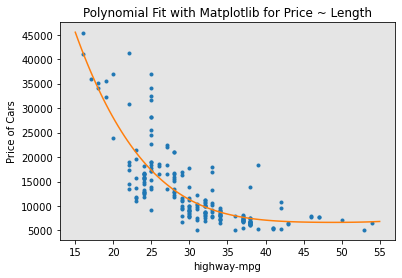

In [38]:
f11 = np.polyfit(x, y, 4)
p11 = np.poly1d(f11)  # 11 order polyline
PlotPolly(p11, x, y, 'highway-mpg')

## Multivariate polynomial 

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [41]:
Z_pr = pr.fit_transform(Z)

In [43]:
Z.shape   # original 4 features  (4 origin columns)

(201, 4)

In [44]:
Z_pr.shape  # after transform 15 features : X1, X1X2, X1X3, X1^2 ...

(201, 15)

## Pipe line

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [65]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [66]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [67]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [68]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [69]:
Input = [('scale', StandardScaler()),('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# Measure for in-sample evaluation

## Simple linear regression

In [70]:
lm.fit(X, y)

LinearRegression()

In [71]:
print('The R-square is: ', lm.score(X, y))

The R-square is:  0.7609686443622008


In [73]:
Yhat = lm.predict(X)
Yhat[0:4]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408])

In [74]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.025174143


## Multiple linear regression

In [75]:
lm.fit(Z, df['price'])
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577458


In [76]:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.870726487


## Polynominal fit

In [77]:
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906522


In [78]:
mean_squared_error(df['price'], p(x))

20474146.4263612

# Prediction and decision making

In [79]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [80]:
new_input = np.arange(1, 100, 1).reshape(-1, 1)  # -1=1D array, same length as origin

In [82]:
lm.fit(X,Y)

LinearRegression()

In [83]:
yhat=lm.predict(new_input)
yhat[0:5]

array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

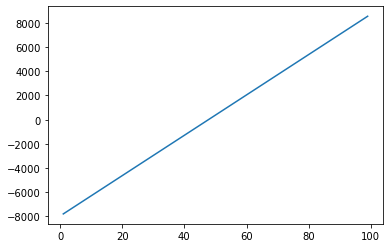

In [84]:
plt.plot(new_input, yhat)
plt.show()

### To check which model get the best result, it is important to compare both R2 and Rsquare.